<a href="https://colab.research.google.com/github/NaveenMururgesan/Customer-conversion-Rate/blob/main/Customer_Conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")


## **IMPORT THE DATASET**

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/NaveenMururgesan/Data-sets/main/train.csv')


In [ ]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


### ***CHECKING BALANCED OR NOT***

In [ ]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
((39922)/(39922+5289))*100

88.30151954170445

In [ ]:
((5289)/(39922+5289))*100

11.698480458295547

The target column is imbalanced here,

1. MAJORITY CLASS is from no (88.3%)
2. MINORITY CLASS is from yes (11.6%)

In [ ]:
data['y']=data['y'].map({'yes':1,'no':0})

# **DATA PREPROCESSING**

In [ ]:
data.shape

(45211, 11)

## **CLEAN THE DATA**
To clean the data i'm going to do 4 steps:
  
  1. Missing values(data) and checking duplicate data
  2. Spelling correction
  3. Data format check (datatype) 
  4. Outlier check

In [ ]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
data.duplicated().sum()

6

Here, We got 6 duplicates in data.
We can drop the duplicates.

In [ ]:
data=data.drop_duplicates()
data.duplicated().sum()

0

## **check is data in right format**

In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

## **check spelling mistakes in object datas:**

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
print(data['job'].unique())
print(data['marital'].unique())
print(data['education_qual'].unique())
print(data['call_type'].unique())
print(data['mon'].unique())
print(data['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[0 1]


## **checking outliers in the given data**

In [ ]:
data.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


In [ ]:
data["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

<AxesSubplot:xlabel='age'>

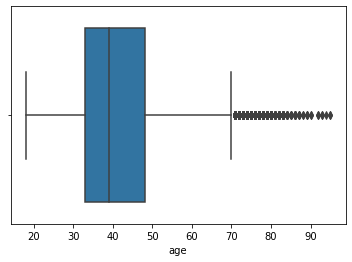

In [ ]:
sns.boxplot(data['age'])

In [ ]:
df= data['age'] 
outliers=[] 
def detect_outliers(df): 
  threshold=3 
  mean=np.mean(df) 
  std=np.std(df) 
  for i in df: 
    z_score=(i-mean)/std 
    if z_score > threshold and z_score < threshold: 
      outliers.append(z_score) 
    return outliers

In [ ]:
detect_outliers(df)

[]

## **EDA**
From EDA we can decide the encode type and feature relationships and importance.

##*DISTRIBUTION OF FEATURES*

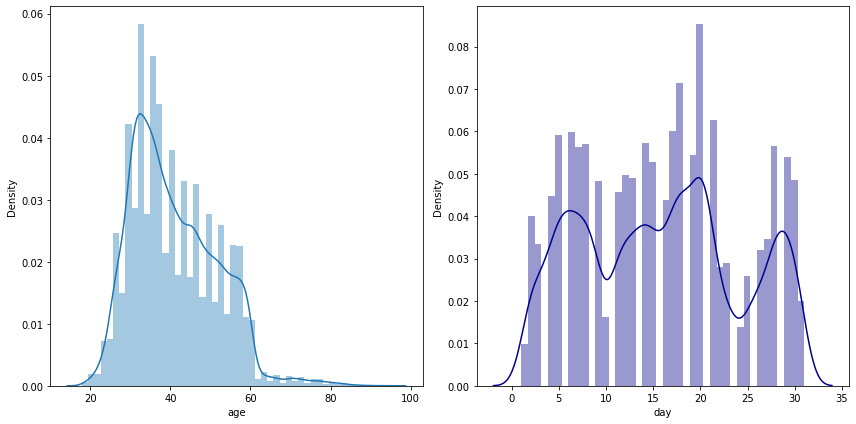

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data.age)
plt.subplot(1,2,2)
sns.distplot(data.day,color = 'darkblue')
plt.tight_layout()

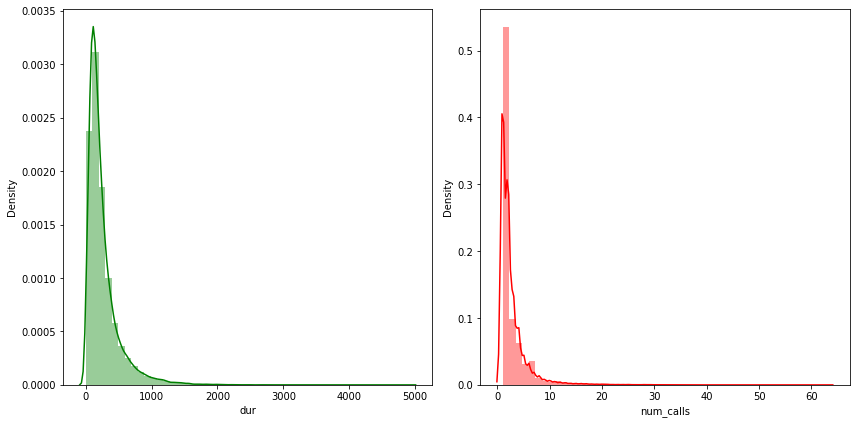

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data.dur,color = 'green')
plt.subplot(1,2,2)
sns.distplot(data.num_calls,color = 'red')
plt.tight_layout()

The DUR distributed between 0 to 1500.
The NUM_CALLS distributed between 1 to 31.

### *Percentage distribution*

## **JOB**

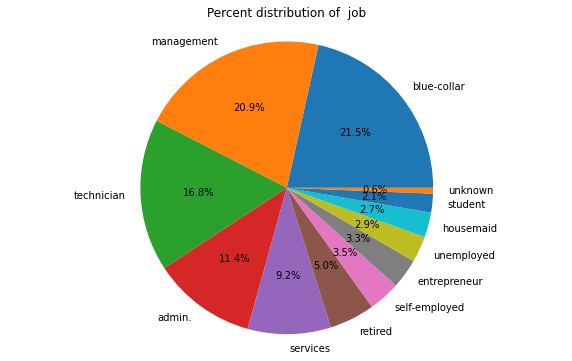

In [ ]:
plt.figure(figsize=(10,6))
df_source = data.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')
plt.show()

In percentage wise distribution in job, we got MANAGEMENT high range and UNKNOWN in low range.

## **MARITAL**

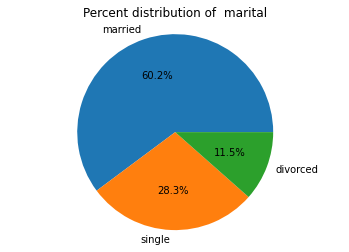

In [ ]:
df_source = data.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')
plt.show()

In percentage wise distribution in marital status, we got MARRIED distributed more than others.
MARRIED peoples have more commitment other than all over here.

### **EDUCATION_QUAL**

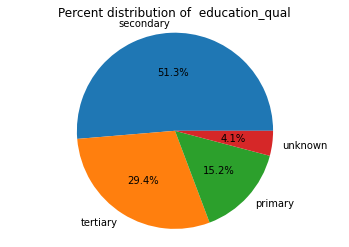

In [ ]:
df_source = data.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')
plt.show()

In percentage wise distribution in equcation qualification, we got SECONDARY distributed  more than others. 
Here, SECONDARY qualified may aware of the insurance benefits other than people over mentioned here.

### **CALL_TYPE**

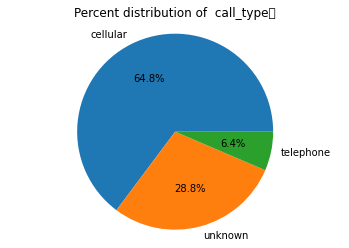

In [ ]:
df_source = data.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type	')
plt.axis('equal')
plt.show()

In percentage wise distribution in call type,we got cellular  distributed  more than others. 

### **MON**

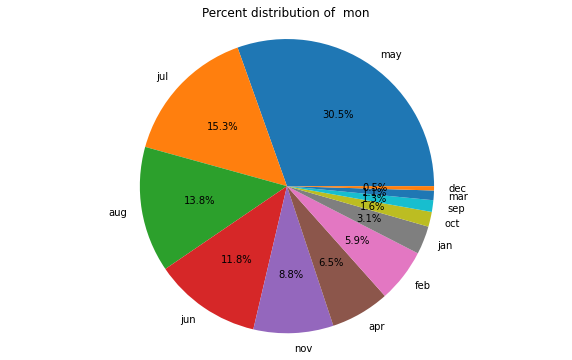

In [ ]:
plt.figure(figsize=(10,6))
df_source = data.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')
plt.show()

In percentage wise distribution in call type,we got SECONDARY distributed as more than others. 

### **PREV_OUTCOME**

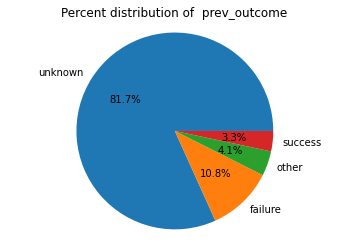

In [ ]:
df_source = data.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')
plt.show()

In percentage wise distribution in previous outcome ,we got unknown distributed more than others. 

### *BAR PLOT PERSPECTIVE FOR Call_type,mon,prev_outcome,prev_outcome*

In [ ]:
A=data['call_type'].groupby(data['call_type']).count()
B=data['mon'].groupby(data['mon']).count()
C=data['prev_outcome'].groupby(data['prev_outcome']).count()
D=data['day'].groupby(data['day']).count()

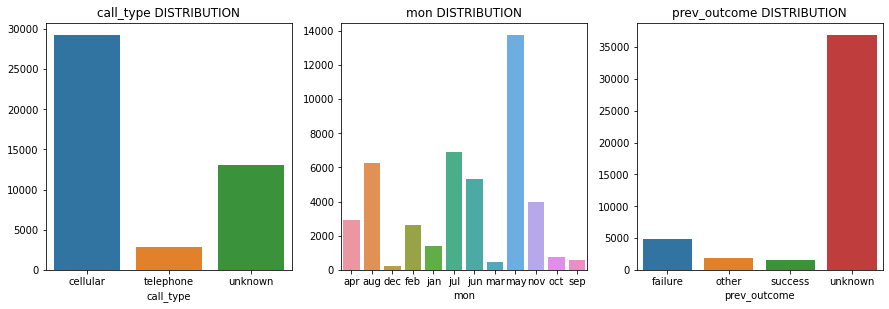

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.barplot(x=A.index,y=A.values,data=data)
plt.title('call_type DISTRIBUTION')

plt.subplot(2,3,2)
sns.barplot(x=B.index,y=B.values,data=data)
plt.title('mon DISTRIBUTION')

plt.subplot(2,3,3)
sns.barplot(x=C.index,y=C.values,data=data)
plt.title('prev_outcome DISTRIBUTION')

plt.show()
plt.tight_layout()

CELLUAR: Cellular distibuted more than others. It may be one of the reason now a days cellular is used more than others.

MON: May distributed more than others. It may be vocation time for the people.

PREV_OUTCOME: Unknown distributed more than others. It may be the people may not used to share the information.


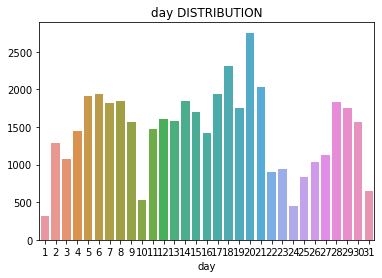

In [ ]:
sns.barplot(x=D.index,y=D.values,data=data)
plt.title('day DISTRIBUTION')
plt.show()

DAY: It may doesn't make any impact to the prediction we can keep it or drop the day column.

### **Percentage of features in together**

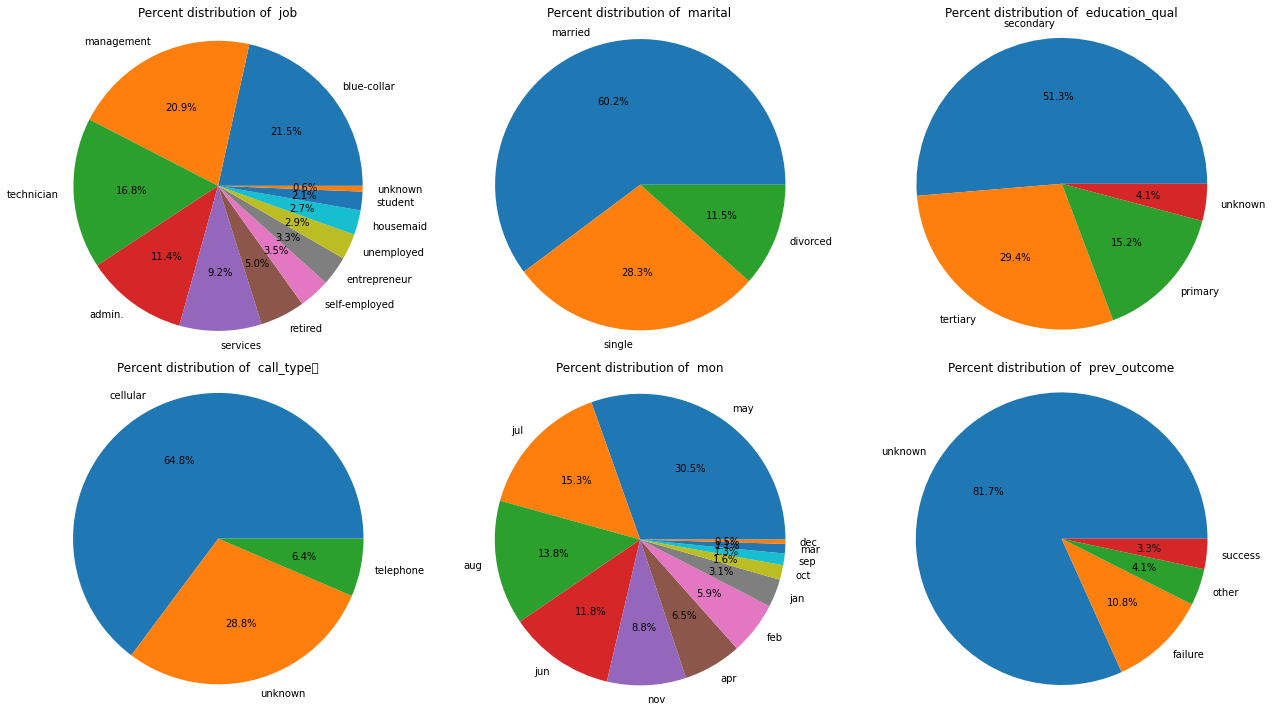

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(231)
df_source = data.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')

plt.subplot(232)
df_source = data.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')

plt.subplot(233)
df_source = data.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')

plt.subplot(234)
df_source = data.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type	')
plt.axis('equal')

plt.subplot(235)
df_source = data.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')

plt.subplot(236)
df_source = data.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')

plt.tight_layout()
plt.show()

### *FOR CONTINUOUS COLUMNS*

AGE

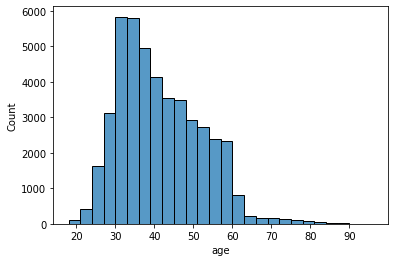

In [ ]:
sns.histplot(data=data, x="age", binwidth=3)
plt.show()

AGE distributed b/w more at the age of 3o plus to 40

DAY

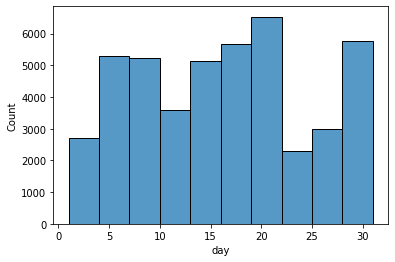

In [ ]:
sns.histplot(data=data, x="day", binwidth=3)
plt.show()

DAY : The middle of the day recieve more than other.

DUR

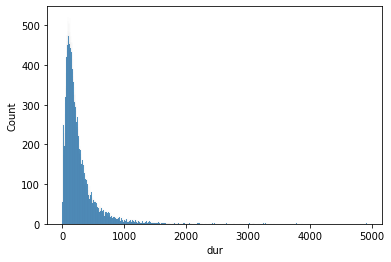

In [ ]:
sns.histplot(data=data, x="dur", binwidth=3)
plt.show()

DUR: Call duration impact the model to subcribe the insurance.

NUM_CALLS

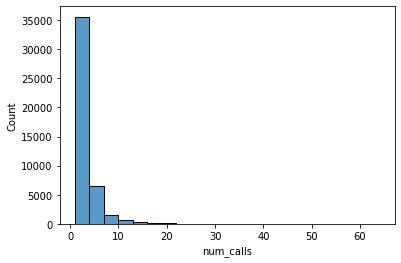

In [ ]:
sns.histplot(data=data, x="num_calls", binwidth=3)
plt.show()

NUM_CALLS: num_calls also one of the reason to sbscribe the insurance.

**ALL CONTINUOUS FEATURES PLOTS TOGETHER HERE FOR OUR OVERVIEW**

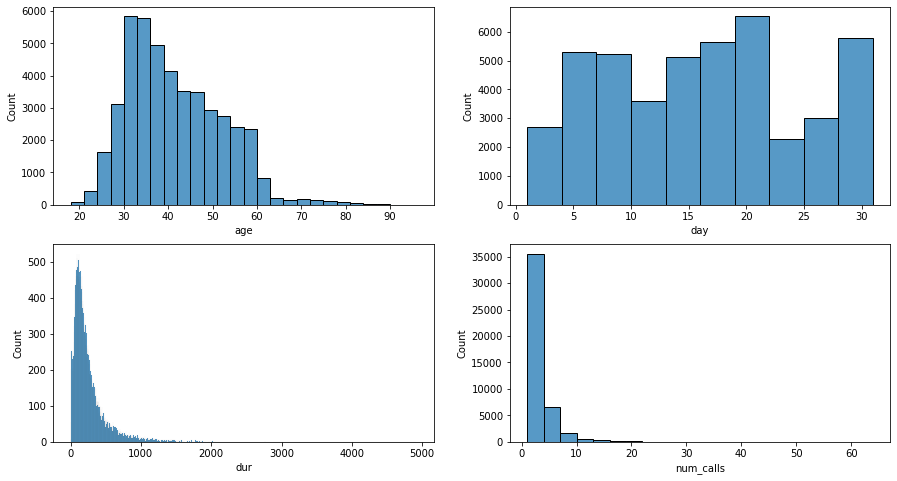

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.histplot(data=data, x="age", binwidth=3)

plt.subplot(222)
sns.histplot(data=data, x="day", binwidth=3)

plt.subplot(223)
sns.histplot(data=data, x="dur", binwidth=3)

plt.subplot(224)
sns.histplot(data=data, x="num_calls", binwidth=3)

plt.show()
plt.tight_layout()

## *FEATURES VS TARGET*

### **JOB**

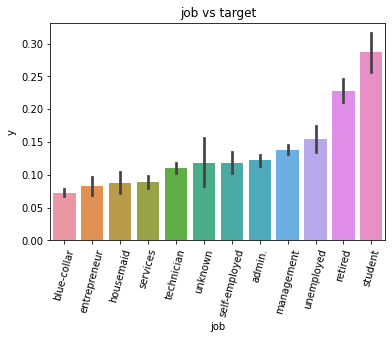

In [ ]:
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')
plt.show()

FROM JOB VS TARGET ,
We got that student are targeted to subcribe the insurance more than others and then, the RETIRED people are targeted more.
We can use one-hot encoding for job because of there is no linear increase in job column.
But it may leads to us to handel more number of columns.SO, here we avoid one-hot and go with label.

    {'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5','self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'}


### **MARITIAL**

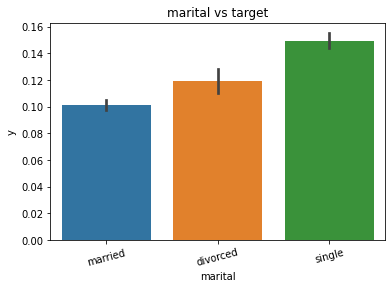

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')
plt.show()
plt.tight_layout()

FROM MARITIAL VS TARGET ,
We got SINGLE people targeted more to subscribe the insurance more than others.

We can use one-hot encoding for marital because, there is no linear increase in marital column.


### **EQUCATION _QUAL**

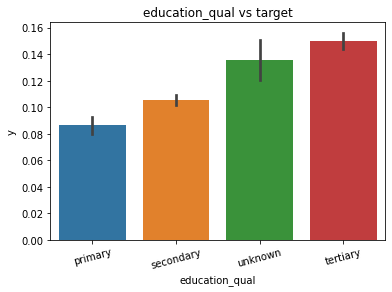

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')
plt.show()
plt.tight_layout()

FROM EQUCATION QUALIFICATION VS TARGET ,
We got TERTIARY people interested more to subscribe the insurance more than others.

Education qualification gives as a linear increase, so we will go with lable encoding.

    {'primary':0,'secondary':1,'unknown':2,'tertiary':3}


### **CALL TYPE**

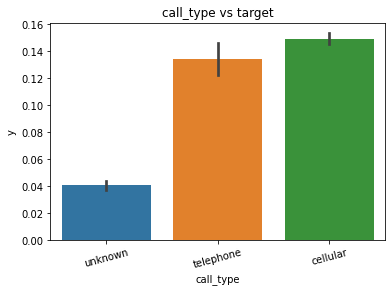

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')
plt.show()
plt.tight_layout()

FROM CALL TYPE VS TARGET ,
We got CELLULAR people interested more to subscribe the insurance more than others.

There is no linear increase in call_type column.so, we want to do one-hot encode. But here we took lable encoding to avoid columns complexity.

          {'unknown':0,'telephone':1,'cellular':2}

### **MON**

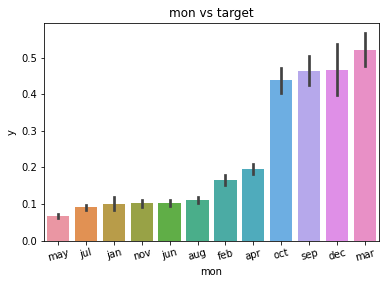

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')
plt.show()
plt.tight_layout()

FROM MONTH VS TARGET ,
We got MAR month scored much amount to subscribe the insurance more than others.


### **PREV_OUTCOME**

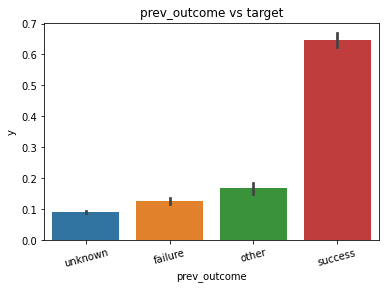

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')
plt.show()
plt.tight_layout()

FROM PREVIOUS OUTCOME VS TARGET ,
We got SUCCESS people interested more to subscribe the insurance more than others.

There is no linear increase in Previous outcome column.SO, we will go with prev_outcome.

### **FEATURES VS TARGET PLOTS TOGETHER**

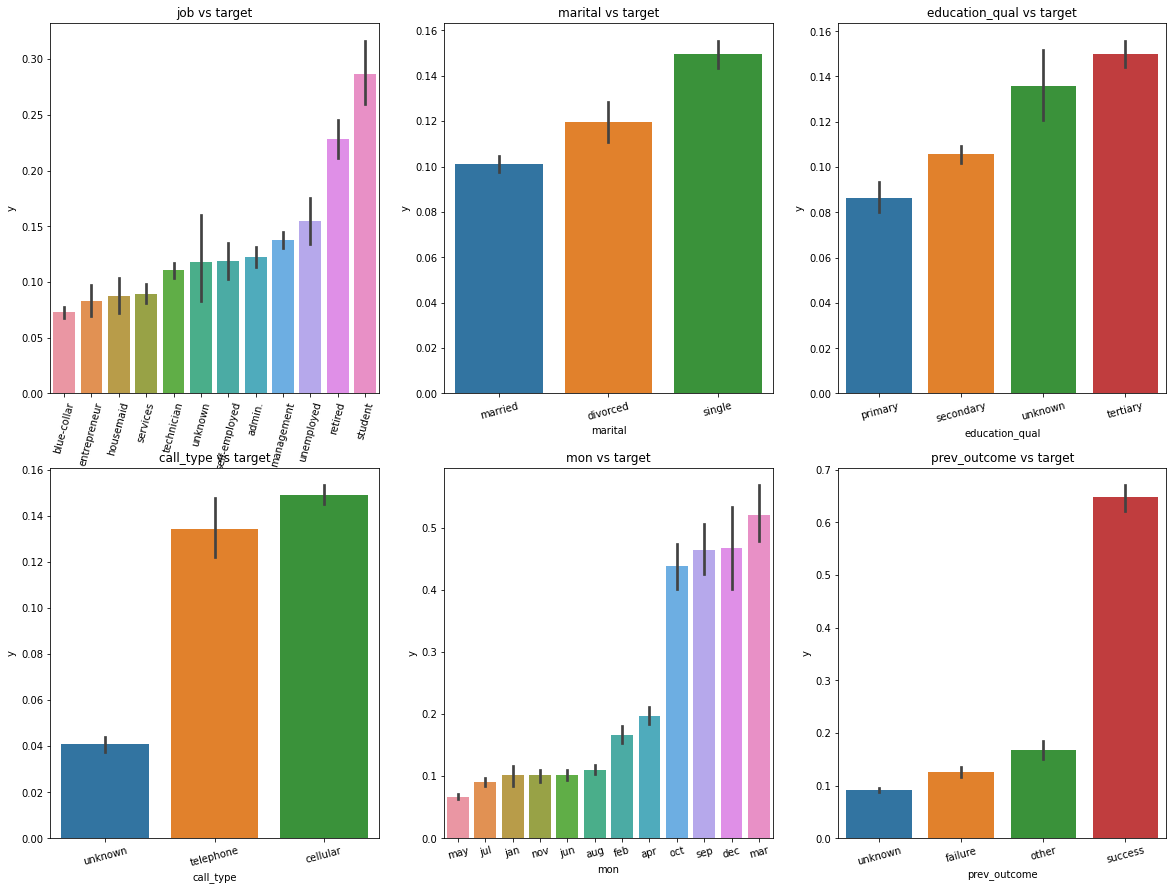

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')

plt.subplot(232)
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')

plt.subplot(233)
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')

plt.subplot(234)
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')

plt.subplot(235)
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')

plt.subplot(236)
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')

plt.show()
plt.tight_layout()

### **CONTINUOUS FEATURES**

AGE

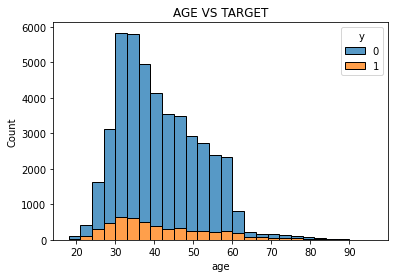

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.histplot(data=data, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')

plt.show()
plt.tight_layout()

Middle Age peoples insured more than the young and aged ones.

DAY

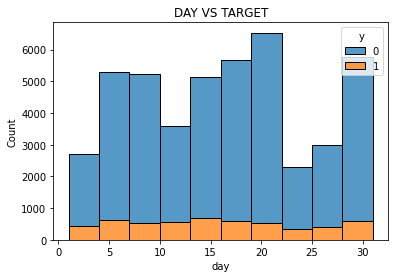

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.histplot(data=data, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')

plt.show()
plt.tight_layout()

Day may not a reason for subscribtion. Etheir we can drop or not. It's upto we to decide.

DUR

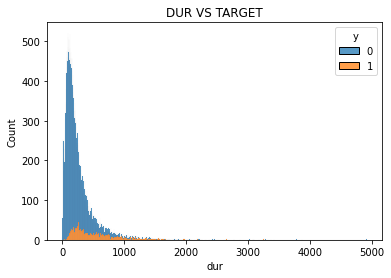

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.histplot(data=data, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')
plt.show()
plt.tight_layout()

Duration of the call plays a major role in subcribtion.

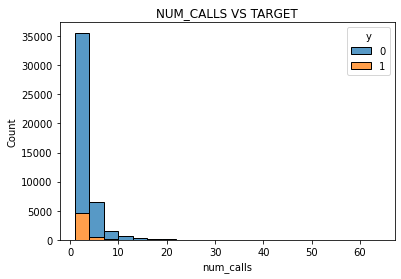

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.histplot(data=data, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')

plt.show()
plt.tight_layout()

Number of calls may be one of the reason for the subscribtion.

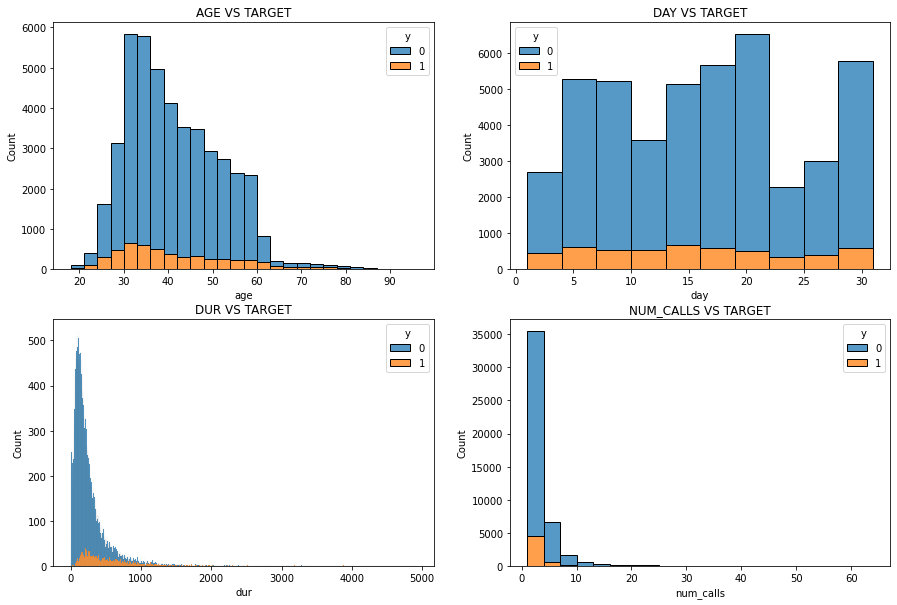

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=data, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')

plt.subplot(222)
sns.histplot(data=data, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')

plt.subplot(223)
sns.histplot(data=data, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')

plt.subplot(224)
sns.histplot(data=data, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')

plt.show()
plt.tight_layout()

From this plot itself we came to know there is an imbalance data in target variable.

## *FEATURE ANALYSIS*

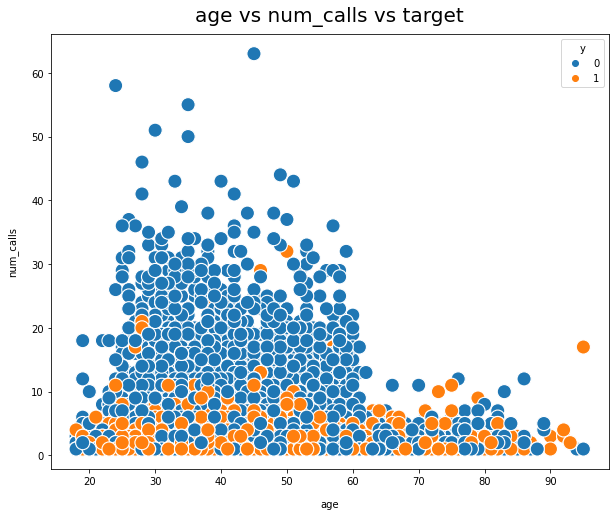

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='num_calls', hue='y', data=data, s=200)
plt.title("age vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

Age may be the reason for the bank people to increase the number of calls.

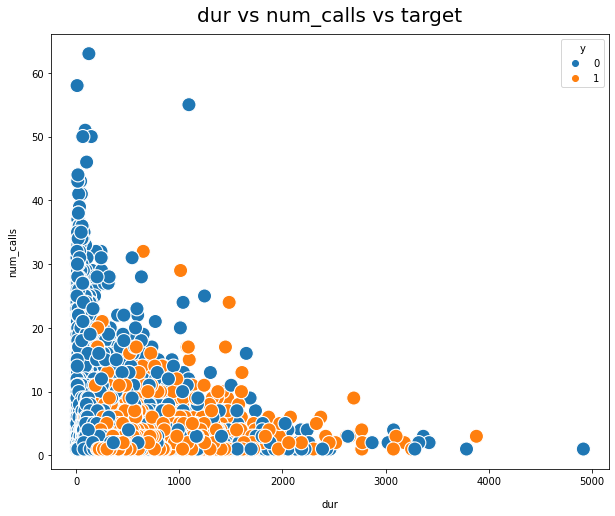

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dur', y='num_calls', hue='y', data=data, s=200)
plt.title("dur vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("dur", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

From this plot we can observe that the people who doesn't pick and who doesn't subcribe the insurance may leads to call more number of times.

Another view of the plot is the insurance subscribed more when they spend more duration to discuss with the bank people to know about insurance policies.

FROM EDA PART,

The 3 feature importance in our point of view:
1. Number calls they made
2. Duration of the call they spend
3. Maritial status

## **ENCODE THE DATA**

In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

### **LABEL ENCODING**

In [ ]:
data['job']=data['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})
data['education_qual']=data['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
data['call_type']=data['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
data['mon']=data['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

### **ONE-HOT ENCODING**

In [ ]:
data= pd.get_dummies(data, columns=["marital",'prev_outcome'])
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


We done with the Encoding part.Now, move with the target and feature selection

In [ ]:
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


## **TARGET AND FEATURE SELCTION:**

In [ ]:
X = data[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = data['y'].values

We have selected our features and the target variable

## **SPLITTING**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

We have split the data 

# **Random Undersampling:**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler #  import 
rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr1 = LogisticRegression()
lr1.fit(X_rus,y_rus)
lr1.score(X_rus,y_rus)

0.8045799715234931

# **Random Oversampling:**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr2 = LogisticRegression()
lr2.fit(X_ros,y_ros)
lr2.score(X_ros,y_ros)

0.8012206572769953

# **SMOTE:**

In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)

0.8499530516431925

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

## **SMOTEENN**

In [ ]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train, y_train) 

In [ ]:
import collections, numpy
counter = collections.Counter(y_smt)
counter


Counter({0: 23427, 1: 30511})

### **To balance the data:**

1. For Random under sampling , the model score is 81.78%
2. For Random over sampling , the model score is 80.3%
3. SMOTE, the model score is 86.03%
4. SMOTE + Tomek, the model score is 92.2%.

Here we got the best score from SMOTE+Tomek which is 92.2%.

Now,We gonna use SMOTE+Tomek technique to build the models.

# **1. Logistic Regression:**

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)

0.9082046815056434

In [ ]:
lr.predict_proba(X_test)

array([[0.26496491, 0.73503509],
       [0.92030251, 0.07969749],
       [0.57283781, 0.42716219],
       ...,
       [0.90654852, 0.09345148],
       [0.97502032, 0.02497968],
       [0.81100251, 0.18899749]])

# **2. DECISION TREE:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.7957219928883802


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier(max_depth=4) 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

0.9077598828696926
AUROC on the sampled dataset :  0.8706548178596244


# **3. K-NEAREST NEIGHBOUR:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.8534458270180414
K value : 2 Cross Value Accuracy : 0.8794382242213856
K value : 3 Cross Value Accuracy : 0.8783336185400674
K value : 4 Cross Value Accuracy : 0.8843059697843836
K value : 5 Cross Value Accuracy : 0.8844168337163252
K value : 6 Cross Value Accuracy : 0.885190681073681
K value : 7 Cross Value Accuracy : 0.8850803060675695
K value : 8 Cross Value Accuracy : 0.8853011783112501
K value : 9 Cross Value Accuracy : 0.8850803060675696
K value : 10 Cross Value Accuracy : 0.8854117977802767
K value : 20 Cross Value Accuracy : 0.8849696865985429
K value : 30 Cross Value Accuracy : 0.8843056030900112
K value : 40 Cross Value Accuracy : 0.8840842419205007
K value : 50 Cross Value Accuracy : 0.8833100278687723


In [ ]:
knn= KNeighborsClassifier(i)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))

0.913764664455029
AUROC on the sampled dataset :  0.8457992397923734


# **4. XG_BOOST:**


In [ ]:
import xgboost as xgb


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.9005655649537964
Learning rate :  0.02  Cross-Val score :  0.8989062729183983
Learning rate :  0.03  Cross-Val score :  0.9006760621913656
Learning rate :  0.04  Cross-Val score :  0.9000125898401213
Learning rate :  0.05  Cross-Val score :  0.8987967535324891
Learning rate :  0.1  Cross-Val score :  0.8992384980198505
Learning rate :  0.11  Cross-Val score :  0.8991282452451964
Learning rate :  0.12  Cross-Val score :  0.8989066396127707
Learning rate :  0.13  Cross-Val score :  0.8976903143793086
Learning rate :  0.14  Cross-Val score :  0.8980215616291009
Learning rate :  0.15  Cross-Val score :  0.8978004449225052
Learning rate :  0.2  Cross-Val score :  0.9022243680633648
Learning rate :  0.5  Cross-Val score :  0.8937072801056081
Learning rate :  0.7  Cross-Val score :  0.8935973940253265
Learning rate :  1  Cross-Val score :  0.8904995599667529


In [ ]:
X_smt

array([[54,  0,  1, ...,  0,  0,  1],
       [53,  2,  1, ...,  0,  0,  1],
       [28,  7,  1, ...,  0,  0,  0],
       ...,
       [53,  4,  1, ...,  0,  0,  0],
       [53,  1,  0, ...,  0,  0,  1],
       [32,  7,  1, ...,  0,  0,  0]])

# **5. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.916143960670057


## **SOLUTION STATEMENT:**

### **MODELLING:**

Models are tested to see which one can better predict consumer conversion.

1. LOGISTIC REGRESSION, the model AUROC score is 0.89
2. DECISION TREE with max depth, the model AUROC score is 0.87
3. KNN, the model AUROC score is 0.85
4. RANDOM FOREST, the model AUROC score is 0.90
5. XG BOOST CLASSIFIER, the model AUROC score is 0.9014

The model XG BOOST has the highest AUROC score, coming in at 0.914.

### **BUSINESS INTERPRETATION :** 

IMPORTANT FEATURES FOR  MAKING PREDICTIONS,

1. Duration of the call: The length of time we spend interacting with consumers will have a significant influence on conversion.
2. Month :One of the reasons a consumer could consider it is that we are offering insurance during the ideal time of year,that is during the financial year ends
3. Pervious outcome unknown : It's crucial to improve our first impression. Because the preceding result greatly influences customers' decisions
4. Marital_married: People who got married may consider purchasing insurance. 

At the end of these analysis, we came to know that we have to approach right person in the right time and explain it in a right manner.Here, the term right person means married peoples who have more responsibility then other, right time in the sense on which time they may be avaiable which month they may think of it and right manner means the processes of explanation we have make begin the conversation in an interesting way and end with a detailed package.